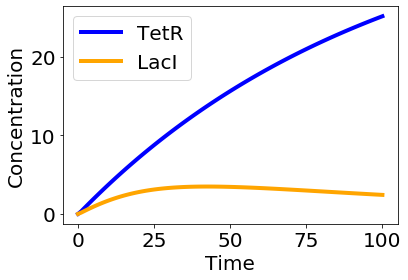

In [1]:
import numpy as np
from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model

# Toggle Switch dynamics
species = ["m_t", "m_l", "p_t", "p_l"]
params = [("K",100),("b_t",50),("b_l",10),("d_t",5),("d_l",5),
          ("del_t",0.01), ("del_l",0.02), ("beta_t", 0.02), ("beta_l", 0.01)]
rxn1 = ([], ["m_t"], "hillnegative", {"s1":"p_l", "k":"K", "K":"b_t", "n":2})
rxn2 = (["m_t"],[], "massaction", {"k":"d_t"})
rxn3 = ([], ["m_l"], "hillnegative", {"s1":"p_t", "k":"K", "K":"b_l", "n":2})
rxn4 = (["m_l"],[], "massaction", {"k":"d_l"})

rxn5 = (["p_t"],[], "massaction", {"k":"del_t"})
rxn6 = ([], ["p_t"], "general", {"rate":"beta_t*m_t"})

rxn7 = (["p_l"],[], "massaction", {"k":"del_l"})
rxn8 = ([], ["p_l"], "general", {"rate":"beta_l*m_l"})

reactions = [rxn1, rxn2, rxn3, rxn4, rxn5, rxn6, rxn7, rxn8]

x0 = {"m_t":1e-5, "m_l":1e-5, "p_t":1e-5, "p_l":1e-5}
M = Model(species = species, parameters = params, reactions = reactions, initial_condition_dict = x0)
timepoints = np.linspace(0,100,100)
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
#%config InlineBackend.figure_f.ormats=['svg']
color_list = ['b', 'orange', 'b','g','y','m','c']
mpl.rc('axes', prop_cycle=(mpl.cycler('color', color_list) ))
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)
solutions = py_simulate_model(timepoints, Model = M, stochastic = False)
plt.plot(timepoints, solutions['p_t'], lw = 4,label = "TetR")
plt.plot(timepoints, solutions['p_l'], lw = 4, label = "LacI")
plt.legend(fontsize = 20)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Concentration', fontsize = 20);

In [2]:
from bioscrape.analysis import py_get_jacobian, py_get_sensitivity_to_parameter
states = np.array([2, 4, 5, 10])
jacobian = py_get_jacobian(M, states, method = 'fourth_order_central_difference')
print('Jacobian:')
print(jacobian)

Jacobian:
[[-5.00000000e+00 -8.88178420e-14 -7.10542736e-14 -7.39644970e-01]
 [ 0.00000000e+00 -5.00000000e+00 -6.40000000e+00  0.00000000e+00]
 [ 2.00000000e-02  1.44560290e-17 -1.00000000e-02  5.78241159e-18]
 [-3.46944695e-16  1.00000000e-02 -1.38777878e-16 -2.00000000e-02]]


In [3]:
from bioscrape.analysis import SensitivityAnalysis
sens_obj = SensitivityAnalysis(M)
sens_obj.compute_J(states)

array([[-5.00000000e+00, -8.88178420e-14, -7.10542736e-14,
        -7.39644970e-01],
       [ 0.00000000e+00, -5.00000000e+00, -6.40000000e+00,
         0.00000000e+00],
       [ 2.00000000e-02,  1.44560290e-17, -1.00000000e-02,
         5.78241159e-18],
       [-3.46944695e-16,  1.00000000e-02, -1.38777878e-16,
        -2.00000000e-02]])

In [6]:
states = np.array([20, 4, 5, 10])
sensitivity_to_param = py_get_sensitivity_to_parameter(M, states, 'beta_t', method = 'backward_difference')
print('Sensitivity to the parameter beta_t')
print(sensitivity_to_param)

initial params {'DummyVar_NegativeHillPropensity_n_0': 2.0, 'b_t': 50.0, 'K': 100.0, 'd_t': 5.0, 'DummyVar_NegativeHillPropensity_n_1': 2.0, 'b_l': 10.0, 'd_l': 5.0, 'del_t': 0.01, 'beta_t': 0.019403999999999998, 'del_l': 0.02, 'beta_l': 0.01}
initial params in M {'DummyVar_NegativeHillPropensity_n_0': 2.0, 'b_t': 50.0, 'K': 100.0, 'd_t': 5.0, 'DummyVar_NegativeHillPropensity_n_1': 2.0, 'b_l': 10.0, 'd_l': 5.0, 'del_t': 0.01, 'beta_t': 0.019403999999999998, 'del_l': 0.02, 'beta_l': 0.01}
params for f_h {'DummyVar_NegativeHillPropensity_n_0': 2.0, 'b_t': 50.0, 'K': 100.0, 'd_t': 5.0, 'DummyVar_NegativeHillPropensity_n_1': 2.0, 'b_l': 10.0, 'd_l': 5.0, 'del_t': 0.01, 'beta_t': 0.019598039999999997, 'del_l': 0.02, 'beta_l': 0.01}
params in M for f_h {'DummyVar_NegativeHillPropensity_n_0': 2.0, 'b_t': 50.0, 'K': 100.0, 'd_t': 5.0, 'DummyVar_NegativeHillPropensity_n_1': 2.0, 'b_l': 10.0, 'd_l': 5.0, 'del_t': 0.01, 'beta_t': 0.019598039999999997, 'del_l': 0.02, 'beta_l': 0.01}
params reset a

In [5]:
from bioscrape.analysis import py_sensitivity_analysis
SSM = py_sensitivity_analysis(M, timepoints, normalize = True)

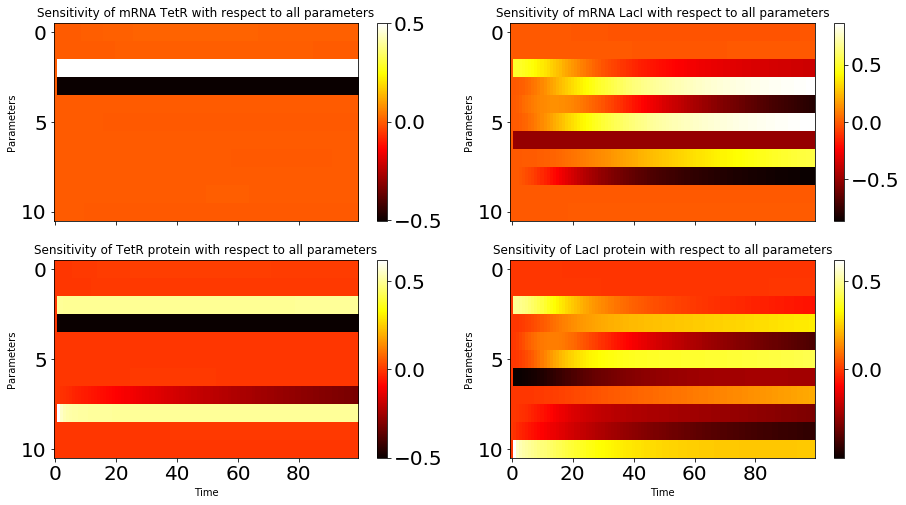

In [6]:
params_values = M.get_parameter_values()
n = 4
SSM = np.reshape(SSM, (len(timepoints), len(params_values), n))
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2, figsize = (15,8), sharex = 'col')
h00 = axs[0,0].imshow(SSM[:,:,0].T,cmap='hot', interpolation='nearest', aspect = 'auto')
fig.colorbar(h00, ax=axs[0,0])
axs[0,0].set_ylabel('Parameters')
axs[0,0].set_title('Sensitivity of mRNA TetR with respect to all parameters')
h01 = axs[0,1].imshow(SSM[:,:,1].T,cmap='hot', interpolation='nearest', aspect = 'auto')
fig.colorbar(h01, ax=axs[0,1])
axs[0,1].set_ylabel('Parameters')
axs[0,1].set_title('Sensitivity of mRNA LacI with respect to all parameters')
h10 = axs[1,0].imshow(SSM[:,:,2].T,cmap='hot', interpolation='nearest', aspect = 'auto')
fig.colorbar(h10, ax=axs[1,0])
axs[1,0].set_title('Sensitivity of TetR protein with respect to all parameters')
h11 = axs[1,1].imshow(SSM[:,:,3].T,cmap='hot', interpolation='nearest', aspect = 'auto')
fig.colorbar(h11, ax=axs[1,1])
axs[1,0].set_xlabel('Time')
axs[1,0].set_ylabel('Parameters')
axs[1,1].set_title('Sensitivity of LacI protein with respect to all parameters')
axs[1,1].set_ylabel('Parameters')
axs[1,1].set_xlabel('Time');